In [1]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import confidence_planner as cp

# example dataset
X, y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=23
)

# training the classifier and calculating accuracy
clf = SVC(gamma=0.001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)

# confidence interval and sample size estimation
ci = cp.estimate_confidence_interval(y_test.shape[0], acc, confidence_level=0.90)
sample = cp.estimate_sample_size(interval_radius=0.05, confidence_level=0.90)

print(f"Holdout accuracy: {acc}")
print(f"90% CI: {ci}")
print(f"Test samples needed for a 0.05 radius 90% CI: {sample}")

Holdout accuracy: 0.9532163742690059
90% CI: [0.9188733241118382, 0.9734413189206182]
Test samples needed for a 0.05 radius 90% CI: 271


In [2]:
acc_svm = acc

clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
y_pred_nb = clf_nb.predict(X_test)
acc_nb = metrics.accuracy_score(y_test, y_pred_nb)

clf_rf = RandomForestClassifier(random_state=23)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
acc_rf = metrics.accuracy_score(y_test, y_pred_rf)

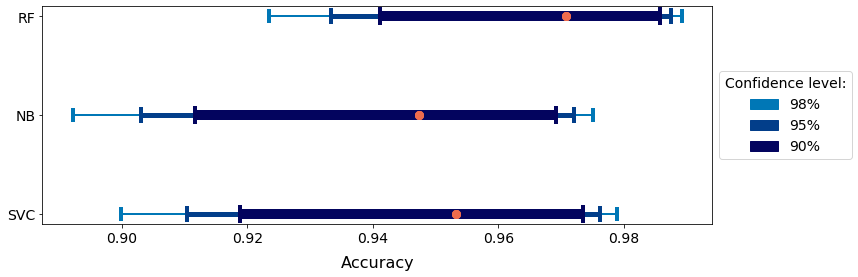

In [7]:
fig = cp.plot_classifier_intervals(
    ["SVC", "NB", "RF"], 
    [y_test.shape[0]]*3, 
    [acc_svm, acc_nb, acc_rf],
    method="holdout_wilson",
    width=12,
    height=4
);

In [8]:
fig.savefig('error_bars.png', dpi=300, bbox_inches="tight")